## Generate Result Tables
- MCHAD
- G-MCHAD
- CAC
- II
- Center Loss
- Softmax Thresholding
- Energy based OOD


In [45]:
import seaborn as sb
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import pandas as pd
from os.path import join

In [46]:
sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")

In [47]:
# root folder for experiment run
root = "/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/"

In [48]:
# map test cases
dataset_map = {
    "test_vs_uniformnoise": "Gauss",
    "test_vs_gaussiannoise": "Uniform",
    "test_vs_tinycrop": "Tiny Crop",
    "test_vs_tinyresize": "Tiny Resize",
    "test_vs_lsuncrop": "LSUN Crop",
    "test_vs_lsunresize": "LSUN Resize",
    "test_vs_textures": "Texture",
}

model_map = {
    "src.models.CAC": "CAC",
    "src.models.Softmax": "Softmax",
    "src.models.MCHAD": "MCHAD",
    "src.models.Center": "Center",
    "src.models.II": "II",
    "src.models.GCAC": "G-CAC",
    "src.models.GCenter": "G-Center",
}


train_dataset_map = {
    "src.datamodules.CIFAR10DataModule": "CIFAR10",
    "src.datamodules.SVHNDataModule": "SVHN",
    "src.datamodules.CIFAR100DataModule": "CIFAR100",
}

In [49]:
def convert(df, key="Distance", task="OSR"):
    """
    Get correct metrics from dataframe
    """
    df.rename(
        inplace=True,
        columns={
            "Accuracy/test": "Accuracy",
            f"{key}/{task}/AUROC/test": "AUROC",
            f"{key}/{task}/AUPR-IN/test": "AUPR-IN",
            f"{key}/{task}/AUPR-OUT/test": "AUPR-OUT",
            f"{key}/{task}/FPR@95TPR/test": "FPR95",
        },
    )

    return df

In [50]:
directories = [
    "./svhn/mchad/1",
    "./svhn/mchad/5",
    "./svhn/mchad/3",
    "./svhn/mchad/2",
    "./svhn/mchad/0",
    "./svhn/mchad/4",
    "./svhn/center/1",
    "./svhn/center/5",
    "./svhn/center/3",
    "./svhn/center/2",
    "./svhn/center/0",
    "./svhn/center/4",
    "./svhn/softmax/1",
    "./svhn/softmax/5",
    "./svhn/softmax/3",
    "./svhn/softmax/2",
    "./svhn/softmax/0",
    "./svhn/softmax/4",
    "./svhn/gmchad/1",
    "./svhn/gmchad/5",
    "./svhn/gmchad/3",
    "./svhn/gmchad/2",
    "./svhn/gmchad/0",
    "./svhn/gmchad/4",
    "./svhn/gcenter/1",
    "./svhn/gcenter/5",
    "./svhn/gcenter/3",
    "./svhn/gcenter/2",
    "./svhn/gcenter/0",
    "./svhn/gcenter/4",
    "./svhn/gcac/1",
    "./svhn/gcac/5",
    "./svhn/gcac/3",
    "./svhn/gcac/2",
    "./svhn/gcac/0",
    "./svhn/gcac/4",
    "./svhn/cac/1",
    "./svhn/cac/5",
    "./svhn/cac/3",
    "./svhn/cac/2",
    "./svhn/cac/0",
    "./svhn/cac/4",
    "./svhn/ii/1",
    "./svhn/ii/5",
    "./svhn/ii/3",
    "./svhn/ii/2",
    "./svhn/ii/0",
    "./svhn/ii/4",
    "./cifar100/mchad/1",
    "./cifar100/mchad/5",
    "./cifar100/mchad/3",
    "./cifar100/mchad/2",
    "./cifar100/mchad/0",
    "./cifar100/mchad/4",
    "./cifar100/center/1",
    "./cifar100/center/5",
    "./cifar100/center/3",
    "./cifar100/center/2",
    "./cifar100/center/0",
    "./cifar100/center/4",
    "./cifar100/softmax/1",
    "./cifar100/softmax/5",
    "./cifar100/softmax/3",
    "./cifar100/softmax/2",
    "./cifar100/softmax/0",
    "./cifar100/softmax/4",
    "./cifar100/gmchad/1",
    "./cifar100/gmchad/5",
    "./cifar100/gmchad/3",
    "./cifar100/gmchad/2",
    "./cifar100/gmchad/0",
    "./cifar100/gmchad/4",
    "./cifar100/gcenter/1",
    "./cifar100/gcenter/5",
    "./cifar100/gcenter/3",
    "./cifar100/gcenter/2",
    "./cifar100/gcenter/0",
    "./cifar100/gcenter/4",
    "./cifar100/gcac/1",
    "./cifar100/gcac/5",
    "./cifar100/gcac/3",
    "./cifar100/gcac/2",
    "./cifar100/gcac/0",
    "./cifar100/gcac/4",
    "./cifar100/cac/1",
    "./cifar100/cac/5",
    "./cifar100/cac/3",
    "./cifar100/cac/2",
    "./cifar100/cac/0",
    "./cifar100/cac/4",
    "./cifar100/ii/1",
    "./cifar100/ii/5",
    "./cifar100/ii/3",
    "./cifar100/ii/2",
    "./cifar100/ii/0",
    "./cifar100/ii/4",
    "./cifar10/mchad/1",
    "./cifar10/mchad/5",
    "./cifar10/mchad/3",
    "./cifar10/mchad/2",
    "./cifar10/mchad/0",
    "./cifar10/mchad/4",
    "./cifar10/center/1",
    "./cifar10/center/5",
    "./cifar10/center/3",
    "./cifar10/center/2",
    "./cifar10/center/0",
    "./cifar10/center/4",
    "./cifar10/softmax/1",
    "./cifar10/softmax/5",
    "./cifar10/softmax/3",
    "./cifar10/softmax/2",
    "./cifar10/softmax/0",
    "./cifar10/softmax/4",
    "./cifar10/gmchad/1",
    "./cifar10/gmchad/5",
    "./cifar10/gmchad/3",
    "./cifar10/gmchad/2",
    "./cifar10/gmchad/0",
    "./cifar10/gmchad/4",
    "./cifar10/gcenter/1",
    "./cifar10/gcenter/5",
    "./cifar10/gcenter/3",
    "./cifar10/gcenter/2",
    "./cifar10/gcenter/0",
    "./cifar10/gcenter/4",
    "./cifar10/gcac/1",
    "./cifar10/gcac/5",
    "./cifar10/gcac/3",
    "./cifar10/gcac/2",
    "./cifar10/gcac/0",
    "./cifar10/gcac/4",
    "./cifar10/cac/1",
    "./cifar10/cac/5",
    "./cifar10/cac/3",
    "./cifar10/cac/2",
    "./cifar10/cac/0",
    "./cifar10/cac/4",
    "./cifar10/ii/1",
    "./cifar10/ii/5",
    "./cifar10/ii/3",
    "./cifar10/ii/2",
    "./cifar10/ii/0",
    "./cifar10/ii/4",
]

In [51]:


def get_training_set(datamodule):
    target = datamodule["_target_"]
    d = train_dataset_map.get(target)

    if not d:
        if target == "src.datamodules.MultiDatamodule":
            d = train_dataset_map.get(datamodule["module1"]["_target_"])

    if not d:
        print(datamodule)
    else:
        print(d)

    return d


def load(path):
    local_df = []

    df = pd.read_csv(join(path, "results.csv"))
    metrics = pd.read_csv(join(path, "csv/version_0/metrics.csv"))
    config = OmegaConf.load(join(path, "config.yaml"))
    df["Dataset"] = get_training_set(config["datamodule"])
    df["Outliers"] = df["test_case_name"].apply(dataset_map.get)
    model = str(config["model"]["_target_"])

    if model == "src.models.CAC":
        df["Model"] = "CAC"
        df = convert(df, "Distance")
    elif model == "src.models.SoftMax":
        print("EB-OOD")
        df_ebm = df.copy(deep=True)
        df_ebm["Model"] = "EB-OOD"
        df_emb = convert(df_ebm, "EnergyBased")

        local_df.append(df_ebm)

        print("Softmax")
        df["Model"] = "Softmax"
        df = convert(df, "Softmax")

    elif model == "src.models.MCHAD":
        if config["model"]["weight_oe"] == 0.0:
            # print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "MCHAD"
        else:
            print(f"Weight OE: {config['model']['weight_oe']}")
            df["Model"] = "G-MCHAD"

        df = convert(df)
    elif model == "src.models.Center":
        df["Model"] = "Center"
        df = convert(df, "Softmax")
    elif model == "src.models.IIModel":
        df["Model"] = "II"
        df = convert(df)
    elif model == "src.models.GCenter":
        df["Model"] = "G-Center"
        df = convert(df)
    elif model == "src.models.GCAC":
        df["Model"] = "G-CAC"
        df = convert(df)
    else:
        raise Exception(f"UNKNOWN: {model}")

    local_df.append(df)
    return config, pd.concat(local_df), metrics

In [52]:
dfs = []

for d in directories:
    # filter(lambda x: "center" not in x and "cifar100/softmax/" not in x and "mchad-o" not in x, directories):
    path = join(root, d)
    config, df, metrics = load(path)
    try:
        if df is not None:
            print(path)
            print(
                f"{df['Dataset'][0]}/{df['Model'][0]} -> {df['AUROC'].mean()} {len(df)}"
            )
            df = df[
                [
                    "Accuracy",
                    "AUROC",
                    "AUPR-IN",
                    "AUPR-OUT",
                    "FPR95",
                    "Dataset",
                    "Outliers",
                    "Model",
                ]
            ]
            dfs.append(df.copy())
    except:
        print("EXCEPTION WHILE LOADING")
        print(df.columns)

df = pd.concat(dfs)

SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/1
SVHN/MCHAD -> 0.9587734767368862 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/5
SVHN/MCHAD -> 0.9756277203559875 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/3
SVHN/MCHAD -> 0.9531514389174325 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/2
SVHN/MCHAD -> 0.968461641243526 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/0
SVHN/MCHAD -> 0.9742180109024048 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/mchad/4
SVHN/MCHAD -> 0.9569066933223179 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/center/1
SVHN/Center -> 0.9681359103747776 8
SVHN
/home/ki/projects/work/mchad/logs/multiruns/complete/01/21/22-13:49:15/./svhn/center/5
SVHN/Center -> 0.96536873

In [53]:
df["AUROC"] = df["AUROC"].apply(lambda x: x * 100)
df["AUPR-IN"] = df["AUPR-IN"].apply(lambda x: x * 100)
df["AUPR-OUT"] = df["AUPR-OUT"].apply(lambda x: x * 100)
df["FPR95"] = df["FPR95"].apply(lambda x: x * 100)
df["Accuracy"] = df["Accuracy"].apply(lambda x: x * 100)

In [54]:
df = df.set_index(["Dataset", "Outliers", "Model"]).dropna()

df

Accuracy      AUROC     AUPR-IN    AUPR-OUT  \
Dataset Outliers    Model                                                 
SVHN    Texture     MCHAD  94.460666  94.835430   98.545772   83.239955   
        Gauss       MCHAD  94.460666  96.411604   98.570943   89.844227   
        Uniform     MCHAD  94.460666  97.935522   99.253476   92.792332   
        Tiny Crop   MCHAD  94.460666  95.953542   97.993886   90.262556   
        Tiny Resize MCHAD  94.460666  95.620346   97.982264   89.291126   
...                              ...        ...         ...         ...   
CIFAR10 Uniform     II     30.939999  99.999994  100.000012  100.000000   
        Tiny Crop   II     30.939999  69.297707   67.206210   67.464596   
        Tiny Resize II     30.939999  60.782659   59.829152   59.629166   
        LSUN Crop   II     30.939999  80.611748   78.560972   79.515314   
        LSUN Resize II     30.939999  58.994937   60.515445   54.674029   

                               FPR95  
Dataset Outliers    Model             
SVHN    Texture     MCHAD  23.829786  
        Gauss       MCHAD  22.579999  
        Uniform     MCHAD  12.100000  
        Tiny Crop   MCHAD  20.930000  
        Tiny Resize MCHAD  23.260000  
...                              ...  
CIFAR10 Uniform     II      0.000000  
        Tiny Crop   II     86.110002  
        Tiny Resize II     90.039998  
        LSUN Crop   II     71.020001  
        LSUN Resize II     94.679999  

[1134 rows x 5 columns]

In [55]:
from itertools import product
datasets = ["SVHN", "CIFAR10", "CIFAR100"]
# models = ["CAC", "II", "Center", "Softmax", "EB-OOD", "MCHAD", "G-MCHAD"]
models = ["MCHAD", "II", "CAC", "Center", "G-MCHAD", "G-Center", "G-CAC"]

t =  df.reset_index().groupby(by=["Dataset", "Model"]).agg(
        {
            "Accuracy": ["mean", "sem"],
            "AUROC": ["mean", "sem"],
            "AUPR-IN": ["mean", "sem"],
            "AUPR-OUT": ["mean", "sem"],
            "FPR95": ["mean", "sem"],
        }
    ).reindex(list(product(datasets, models)))

s = t.to_latex(
        float_format="%.2f",
        multirow=True,
        escape=False,
        label="tab:results",
        # bold_rows="True",
    )

repl = {
    "mean": "Mean",
    "sem": "$\\pm \sigma_{\\bar{x}}$",
    " MCHAD": " \\textbf{MCHAD (ours)}",
    "G-MCHAD": "\\textbf{G-MCHAD (ours)}",
    "G-Center": "\\textbf{G-Center (ours)}",
    "G-CAC": "\\textbf{G-CAC (ours)}",
}

for k, v in repl.items():
    s = s.replace(k, v)

print(s)

\begin{table}
\centering
\label{tab:results}
\begin{tabular}{llrrrrrrrrrr}
\toprule
         &       & \multicolumn{2}{l}{Accuracy} & \multicolumn{2}{l}{AUROC} & \multicolumn{2}{l}{AUPR-IN} & \multicolumn{2}{l}{AUPR-OUT} & \multicolumn{2}{l}{FPR95} \\
         &       &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ &    Mean &  $\pm \sigma_{\bar{x}}$ &     Mean &  $\pm \sigma_{\bar{x}}$ &  Mean &  $\pm \sigma_{\bar{x}}$ \\
Dataset & Model &          &      &       &      &         &      &          &      &       &      \\
\midrule
\multirow{7}{*}{SVHN} & \textbf{MCHAD (ours)} &    94.16 & 0.07 & 96.45 & 0.26 &   98.51 & 0.15 &    89.93 & 0.65 & 19.23 & 1.42 \\
         & II &    12.62 & 0.33 & 54.80 & 3.80 &   77.35 & 2.21 &    33.93 & 3.20 & 89.91 & 3.91 \\
         & CAC &    93.92 & 0.06 & 92.30 & 0.50 &   95.46 & 0.43 &    81.23 & 0.90 & 32.16 & 1.67 \\
         & Center &    94.28 & 0.03 & 96.78 & 0.20 &   98.80 & 0.07 &    91.04 & 0.61 & 19.41 & 1.19 \\
  

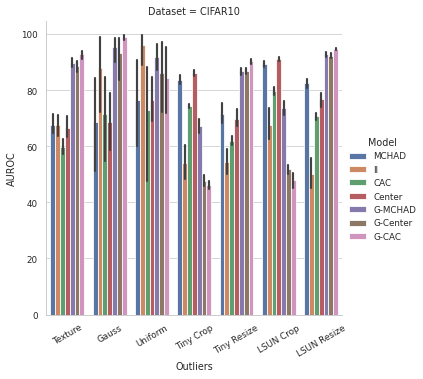

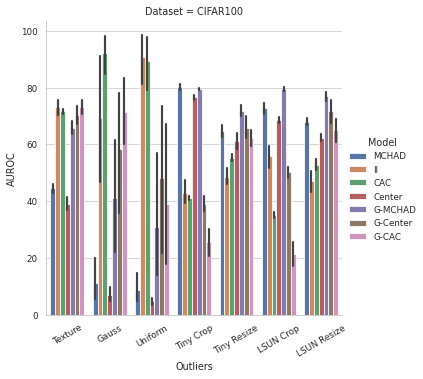

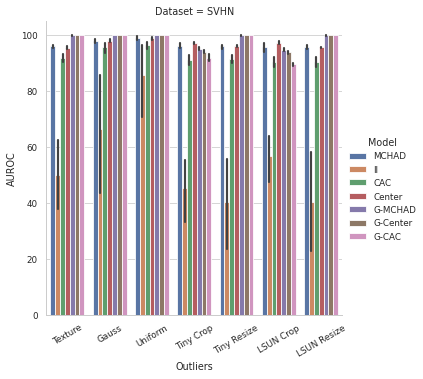

In [56]:
methods = ["MCHAD", "II", "CAC", "Center", "G-MCHAD", "G-Center", "G-CAC"]

for dataset in ["CIFAR10", "CIFAR100", "SVHN"]:
    g = sb.catplot(
        data=df.reset_index()[df.reset_index()["Dataset"] == dataset],
        x="Outliers",
        y="AUROC",
        kind="bar",
        hue="Model",
        col="Dataset",
        hue_order=methods
    )
    g.set_xticklabels(rotation=30)
    plt.savefig(f"out/single-auroc-{dataset}.png", dpi=300)
    plt.show()

In [57]:
tmp = df.reset_index().copy()
tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

print(
    tmp
    .groupby(by=["Dataset", "Model"])
    .agg(
        {
            "Accuracy": ["mean", "std"],
            "AUROC": ["mean", "std"],
            "AUPR-IN": ["mean", "std"],
            "AUPR-OUT": ["mean", "std"],
            "FPR95": ["mean", "std"],
        }
    )
    .to_html(
        float_format="%.2f",
        escape=False,
    )
)


<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th colspan="2" halign="left">Accuracy</th>
      <th colspan="2" halign="left">AUROC</th>
      <th colspan="2" halign="left">AUPR-IN</th>
      <th colspan="2" halign="left">AUPR-OUT</th>
      <th colspan="2" halign="left">FPR95</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
      <th>mean</th>
      <th>std</th>
    </tr>
    <tr>
      <th>Dataset</th>
      <th>Model</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">CIFAR10</th>
      <th>G-MCHAD</th>
      <td>88.63</td>
      <td>0.33</td>
      <td>85.41</td>
      <td>10.68</td>
      

In [58]:
from scipy.stats import ttest_ind

tmp = df.reset_index().copy()
# tmp = tmp[(tmp["Model"] == "MCHAD") | (tmp["Model"] == "G-MCHAD")]

for metric in ["Accuracy", "AUROC", "AUPR-IN", "AUPR-OUT", "FPR95"]:
    for dataset in ["SVHN", "CIFAR10", "CIFAR100"]:
        a = tmp[(tmp["Model"] == "CAC") & (tmp["Dataset"] == dataset)][metric]
        b = tmp[(tmp["Model"] == "MCHAD") & (tmp["Dataset"]== dataset)][metric]
        stat, p = ttest_ind(a,b, equal_var=False)
        print(f"{metric} {dataset} -> {p < 0.05} ")

Accuracy SVHN -> True 
Accuracy CIFAR10 -> True 
Accuracy CIFAR100 -> True 
AUROC SVHN -> True 
AUROC CIFAR10 -> True 
AUROC CIFAR100 -> True 
AUPR-IN SVHN -> True 
AUPR-IN CIFAR10 -> True 
AUPR-IN CIFAR100 -> False 
AUPR-OUT SVHN -> True 
AUPR-OUT CIFAR10 -> False 
AUPR-OUT CIFAR100 -> False 
FPR95 SVHN -> True 
FPR95 CIFAR10 -> True 
FPR95 CIFAR100 -> True 
